In [86]:
!python --version

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Python 3.8.5


In [87]:
df = pd.read_csv(r"C:\Users\William\Desktop\Capstone_Data\MPS_RTXP_2020-07-15_2020-10-14_L_LUZON.csv")

In [88]:
df

,DELIVERY_DATE,DELIVERY_HOUR,REGION_ID,TYPE_ID,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE
0,7/15/2020,1,LUZON,LD,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01
1,7/15/2020,1,LUZON,LD,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01
2,7/15/2020,1,LUZON,LD,1_PHILEXT,1LAT_PHILEX,33.0,2084.01
3,7/15/2020,1,LUZON,LD,AEC,1MEX_AEC,0.0,2101.26
4,7/15/2020,1,LUZON,LD,ALECO,3DAR_ALECO,34.0,2022.11
...,...,...,...,...,...,...,...,...
576283,10/14/2020,24,LUZON,LD,WESMTMP,3LABO_T1L2,3.8,1.00
576284,10/14/2020,24,LUZON,LD,WESMTMP,3LUZ_001,0.0,1.00
576285,10/14/2020,24,LUZON,LD,WESMTMP,3MAKBA_T3L2,37.4,1.00
576286,10/14/2020,24,LUZON,LD,WESMTMP,3MLAYA_T2L2,0.0,1.01


In [89]:
df_orig = df.copy()

In [90]:
df_orig

,DELIVERY_DATE,DELIVERY_HOUR,REGION_ID,TYPE_ID,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE
0,7/15/2020,1,LUZON,LD,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01
1,7/15/2020,1,LUZON,LD,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01
2,7/15/2020,1,LUZON,LD,1_PHILEXT,1LAT_PHILEX,33.0,2084.01
3,7/15/2020,1,LUZON,LD,AEC,1MEX_AEC,0.0,2101.26
4,7/15/2020,1,LUZON,LD,ALECO,3DAR_ALECO,34.0,2022.11
...,...,...,...,...,...,...,...,...
576283,10/14/2020,24,LUZON,LD,WESMTMP,3LABO_T1L2,3.8,1.00
576284,10/14/2020,24,LUZON,LD,WESMTMP,3LUZ_001,0.0,1.00
576285,10/14/2020,24,LUZON,LD,WESMTMP,3MAKBA_T3L2,37.4,1.00
576286,10/14/2020,24,LUZON,LD,WESMTMP,3MLAYA_T2L2,0.0,1.01


In [91]:
df = df.drop(columns=['REGION_ID', 'TYPE_ID'])

In [92]:
df

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE
0,7/15/2020,1,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01
1,7/15/2020,1,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01
2,7/15/2020,1,1_PHILEXT,1LAT_PHILEX,33.0,2084.01
3,7/15/2020,1,AEC,1MEX_AEC,0.0,2101.26
4,7/15/2020,1,ALECO,3DAR_ALECO,34.0,2022.11
...,...,...,...,...,...,...
576283,10/14/2020,24,WESMTMP,3LABO_T1L2,3.8,1.00
576284,10/14/2020,24,WESMTMP,3LUZ_001,0.0,1.00
576285,10/14/2020,24,WESMTMP,3MAKBA_T3L2,37.4,1.00
576286,10/14/2020,24,WESMTMP,3MLAYA_T2L2,0.0,1.01


In [93]:
df['DELIVERY_HOUR'] = df['DELIVERY_HOUR'].apply(lambda x: int(x-1))

In [94]:
df['DELIVERY_HOUR'] = df['DELIVERY_HOUR'].astype('str').apply(lambda x: dt.datetime.strptime(x, '%H'))

In [95]:
df['DELIVERY_HOUR'] = df['DELIVERY_HOUR'].dt.time

In [96]:
df['DELIVERY_DATE'] = pd.to_datetime((df['DELIVERY_DATE']))
df['DELIVERY_HOUR'] = pd.to_timedelta(df['DELIVERY_HOUR'].astype('str'))
df['DATE_HOUR'] = df['DELIVERY_DATE']+df['DELIVERY_HOUR']

In [97]:
df

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
0,2020-07-15,0 days 00:00:00,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01,2020-07-15 00:00:00
1,2020-07-15,0 days 00:00:00,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01,2020-07-15 00:00:00
2,2020-07-15,0 days 00:00:00,1_PHILEXT,1LAT_PHILEX,33.0,2084.01,2020-07-15 00:00:00
3,2020-07-15,0 days 00:00:00,AEC,1MEX_AEC,0.0,2101.26,2020-07-15 00:00:00
4,2020-07-15,0 days 00:00:00,ALECO,3DAR_ALECO,34.0,2022.11,2020-07-15 00:00:00
...,...,...,...,...,...,...,...
576283,2020-10-14,0 days 23:00:00,WESMTMP,3LABO_T1L2,3.8,1.00,2020-10-14 23:00:00
576284,2020-10-14,0 days 23:00:00,WESMTMP,3LUZ_001,0.0,1.00,2020-10-14 23:00:00
576285,2020-10-14,0 days 23:00:00,WESMTMP,3MAKBA_T3L2,37.4,1.00,2020-10-14 23:00:00
576286,2020-10-14,0 days 23:00:00,WESMTMP,3MLAYA_T2L2,0.0,1.01,2020-10-14 23:00:00


In [98]:
df_fe = df.copy()

In [99]:
import statsmodels.api as sm
from pylab import rcParams

In [100]:
#sns.set(rc={'figure.figsize':(20, 8)})
#x = df[df['RESOURCE_ID']=='1BALNEO_L01']['MW'].plot(linewidth=0.5)

In [101]:
df_fe

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
0,2020-07-15,0 days 00:00:00,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01,2020-07-15 00:00:00
1,2020-07-15,0 days 00:00:00,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01,2020-07-15 00:00:00
2,2020-07-15,0 days 00:00:00,1_PHILEXT,1LAT_PHILEX,33.0,2084.01,2020-07-15 00:00:00
3,2020-07-15,0 days 00:00:00,AEC,1MEX_AEC,0.0,2101.26,2020-07-15 00:00:00
4,2020-07-15,0 days 00:00:00,ALECO,3DAR_ALECO,34.0,2022.11,2020-07-15 00:00:00
...,...,...,...,...,...,...,...
576283,2020-10-14,0 days 23:00:00,WESMTMP,3LABO_T1L2,3.8,1.00,2020-10-14 23:00:00
576284,2020-10-14,0 days 23:00:00,WESMTMP,3LUZ_001,0.0,1.00,2020-10-14 23:00:00
576285,2020-10-14,0 days 23:00:00,WESMTMP,3MAKBA_T3L2,37.4,1.00,2020-10-14 23:00:00
576286,2020-10-14,0 days 23:00:00,WESMTMP,3MLAYA_T2L2,0.0,1.01,2020-10-14 23:00:00


In [102]:
#1BALNEO_L01 as RESOURCE ID
DF_1BALNEO_L01 = df_fe['RESOURCE_ID']=='1BALNEO_L01'

In [103]:
DF_1BALNEO_L01 = DF_1BALNEO_L01

In [104]:
DF_1BALNEO_L01 = df_fe.loc[df_fe['RESOURCE_ID'] == '1BALNEO_L01']

In [105]:
DF_1BALNEO_L01

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
50,2020-07-15,0 days 00:00:00,WESM,1BALNEO_L01,23.9,2052.67,2020-07-15 00:00:00
311,2020-07-15,0 days 01:00:00,WESM,1BALNEO_L01,22.9,1863.61,2020-07-15 01:00:00
572,2020-07-15,0 days 02:00:00,WESM,1BALNEO_L01,21.4,1697.97,2020-07-15 02:00:00
833,2020-07-15,0 days 03:00:00,WESM,1BALNEO_L01,20.4,1699.55,2020-07-15 03:00:00
1094,2020-07-15,0 days 04:00:00,WESM,1BALNEO_L01,19.3,1696.21,2020-07-15 04:00:00
...,...,...,...,...,...,...,...
575033,2020-10-14,0 days 19:00:00,WESM,1BALNEO_L01,26.8,1311.84,2020-10-14 19:00:00
575294,2020-10-14,0 days 20:00:00,WESM,1BALNEO_L01,27.1,1363.32,2020-10-14 20:00:00
575555,2020-10-14,0 days 21:00:00,WESM,1BALNEO_L01,26.8,1654.49,2020-10-14 21:00:00
575816,2020-10-14,0 days 22:00:00,WESM,1BALNEO_L01,25.0,1280.42,2020-10-14 22:00:00


In [106]:
DF_1BALNEO_L01 = DF_1BALNEO_L01.drop(columns=['DELIVERY_HOUR', 'PARTICIPANT_ID','RESOURCE_ID','PRICE','DATE_HOUR'])


In [107]:
DF_1BALNEO_L01

,DELIVERY_DATE,MW
50,2020-07-15,23.9
311,2020-07-15,22.9
572,2020-07-15,21.4
833,2020-07-15,20.4
1094,2020-07-15,19.3
...,...,...
575033,2020-10-14,26.8
575294,2020-10-14,27.1
575555,2020-10-14,26.8
575816,2020-10-14,25.0


In [108]:
DF_1BALNEO_L = DF_1BALNEO_L01.set_index('DELIVERY_DATE')

In [109]:
DF_1BALNEO_L.index

DatetimeIndex(['2020-07-15', '2020-07-15', '2020-07-15', '2020-07-15',
               '2020-07-15', '2020-07-15', '2020-07-15', '2020-07-15',
               '2020-07-15', '2020-07-15',
               ...
               '2020-10-14', '2020-10-14', '2020-10-14', '2020-10-14',
               '2020-10-14', '2020-10-14', '2020-10-14', '2020-10-14',
               '2020-10-14', '2020-10-14'],
              dtype='datetime64[ns]', name='DELIVERY_DATE', length=2208, freq=None)

In [110]:
DF_1BALNEO_L

,MW
DELIVERY_DATE,
2020-07-15,23.9
2020-07-15,22.9
2020-07-15,21.4
2020-07-15,20.4
2020-07-15,19.3
...,...
2020-10-14,26.8
2020-10-14,27.1
2020-10-14,26.8


<AxesSubplot:xlabel='DELIVERY_DATE'>

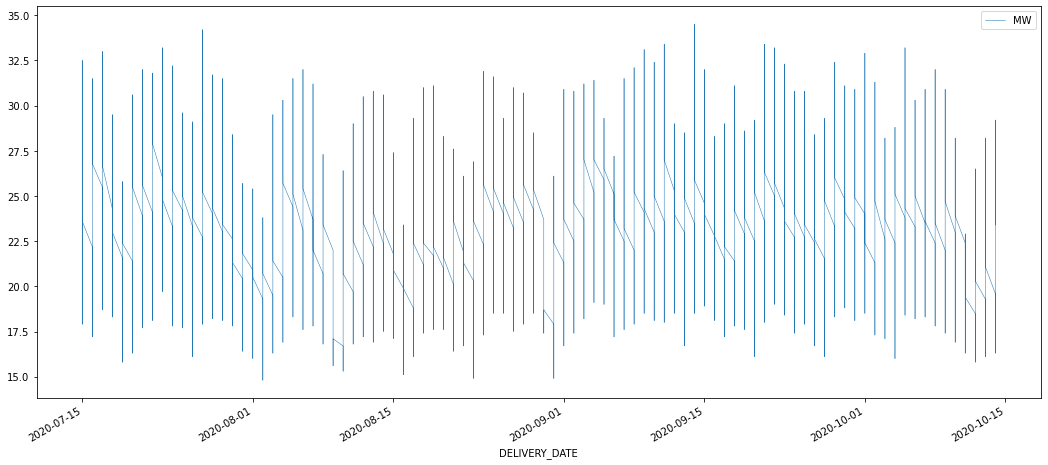

In [111]:
DF_1BALNEO_L.plot(linewidth=0.5)
#MALI HERE

In [112]:
DF_1BALNEO_L01 = df_fe['RESOURCE_ID']=='1BALNEO_L01'
DF_1BALNEO_L01 = DF_1BALNEO_L01
DF_1BALNEO_L01 = df_fe.loc[df_fe['RESOURCE_ID'] == '1BALNEO_L01']
DF_1BALNEO_L01

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
50,2020-07-15,0 days 00:00:00,WESM,1BALNEO_L01,23.9,2052.67,2020-07-15 00:00:00
311,2020-07-15,0 days 01:00:00,WESM,1BALNEO_L01,22.9,1863.61,2020-07-15 01:00:00
572,2020-07-15,0 days 02:00:00,WESM,1BALNEO_L01,21.4,1697.97,2020-07-15 02:00:00
833,2020-07-15,0 days 03:00:00,WESM,1BALNEO_L01,20.4,1699.55,2020-07-15 03:00:00
1094,2020-07-15,0 days 04:00:00,WESM,1BALNEO_L01,19.3,1696.21,2020-07-15 04:00:00
...,...,...,...,...,...,...,...
575033,2020-10-14,0 days 19:00:00,WESM,1BALNEO_L01,26.8,1311.84,2020-10-14 19:00:00
575294,2020-10-14,0 days 20:00:00,WESM,1BALNEO_L01,27.1,1363.32,2020-10-14 20:00:00
575555,2020-10-14,0 days 21:00:00,WESM,1BALNEO_L01,26.8,1654.49,2020-10-14 21:00:00
575816,2020-10-14,0 days 22:00:00,WESM,1BALNEO_L01,25.0,1280.42,2020-10-14 22:00:00


In [113]:
DF_1BALNEO_L01 = DF_1BALNEO_L01.drop(columns=['DELIVERY_DATE','DELIVERY_HOUR', 'PARTICIPANT_ID','RESOURCE_ID','PRICE'])

In [114]:
DF_1BALNEO_L01

,MW,DATE_HOUR
50,23.9,2020-07-15 00:00:00
311,22.9,2020-07-15 01:00:00
572,21.4,2020-07-15 02:00:00
833,20.4,2020-07-15 03:00:00
1094,19.3,2020-07-15 04:00:00
...,...,...
575033,26.8,2020-10-14 19:00:00
575294,27.1,2020-10-14 20:00:00
575555,26.8,2020-10-14 21:00:00
575816,25.0,2020-10-14 22:00:00


In [115]:
DF_1BALNEO_L = DF_1BALNEO_L01.set_index('DATE_HOUR')

In [116]:
DF_1BALNEO_L

,MW
DATE_HOUR,
2020-07-15 00:00:00,23.9
2020-07-15 01:00:00,22.9
2020-07-15 02:00:00,21.4
2020-07-15 03:00:00,20.4
2020-07-15 04:00:00,19.3
...,...
2020-10-14 19:00:00,26.8
2020-10-14 20:00:00,27.1
2020-10-14 21:00:00,26.8


<AxesSubplot:xlabel='DATE_HOUR'>

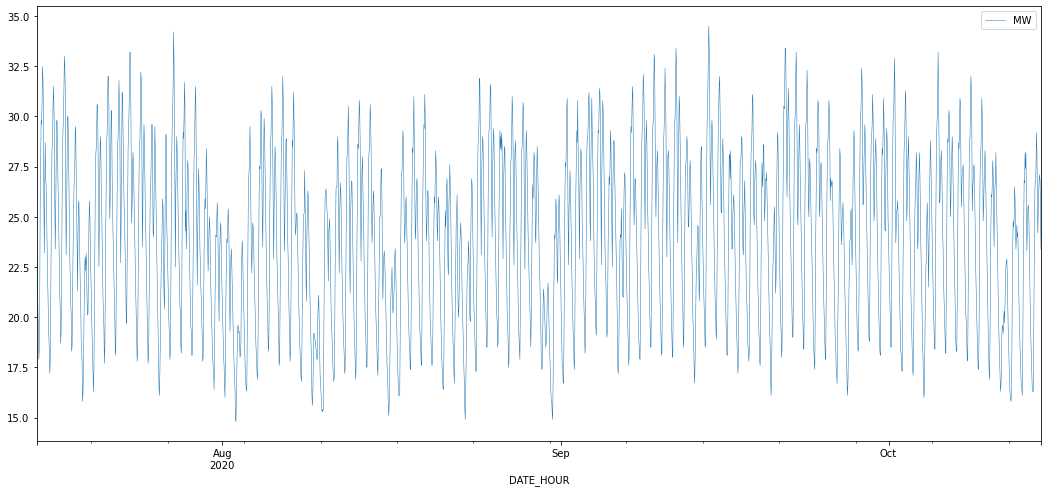

In [117]:
DF_1BALNEO_L.plot(linewidth=0.5)

In [118]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [119]:
decomposition = sm.tsa.seasonal_decompose(DF_1BALNEO_L, model='additive')

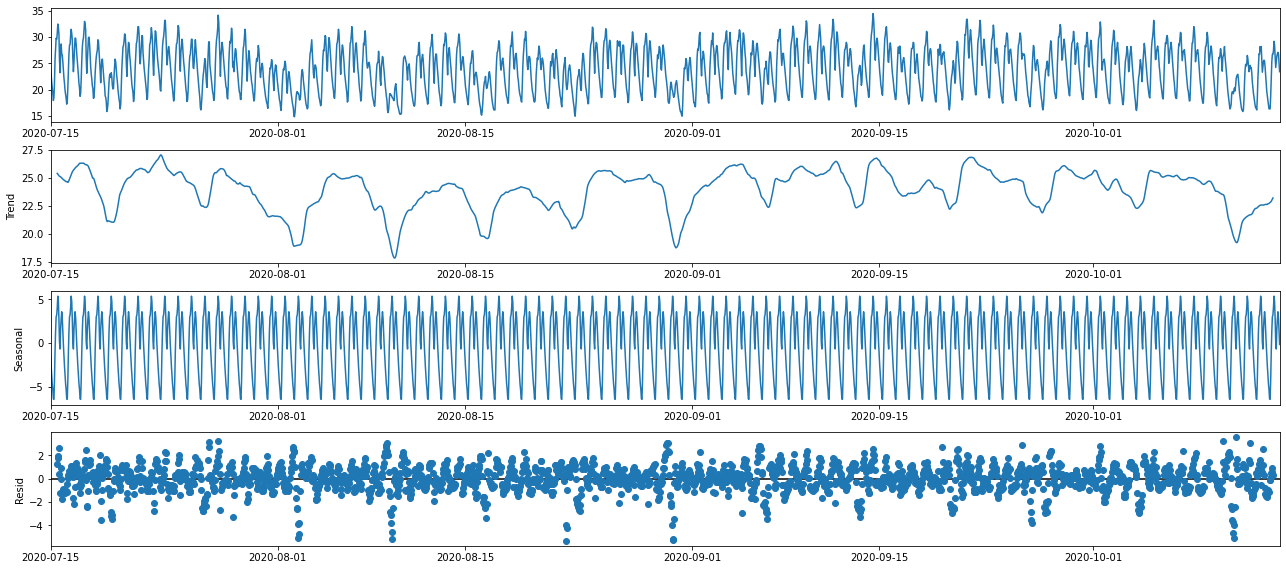

In [120]:
fig = decomposition.plot()
plt.show()

In [121]:
import itertools

In [122]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [123]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(DF_1BALNEO_L,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print ('AIC-order: {}' .format(res.aic_min_order))
        except:
            continue

ded, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:7555.417156997451
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:8920.737121373359C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided

In [124]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

NameError: name 'y' is not defined

In [148]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [138]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-15 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('DATE_HOUR')
ax.set_ylabel('MW')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [149]:
df_fe

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
0,2020-07-15,0 days 00:00:00,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01,2020-07-15 00:00:00
1,2020-07-15,0 days 00:00:00,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01,2020-07-15 00:00:00
2,2020-07-15,0 days 00:00:00,1_PHILEXT,1LAT_PHILEX,33.0,2084.01,2020-07-15 00:00:00
3,2020-07-15,0 days 00:00:00,AEC,1MEX_AEC,0.0,2101.26,2020-07-15 00:00:00
4,2020-07-15,0 days 00:00:00,ALECO,3DAR_ALECO,34.0,2022.11,2020-07-15 00:00:00
...,...,...,...,...,...,...,...
576283,2020-10-14,0 days 23:00:00,WESMTMP,3LABO_T1L2,3.8,1.00,2020-10-14 23:00:00
576284,2020-10-14,0 days 23:00:00,WESMTMP,3LUZ_001,0.0,1.00,2020-10-14 23:00:00
576285,2020-10-14,0 days 23:00:00,WESMTMP,3MAKBA_T3L2,37.4,1.00,2020-10-14 23:00:00
576286,2020-10-14,0 days 23:00:00,WESMTMP,3MLAYA_T2L2,0.0,1.01,2020-10-14 23:00:00


In [150]:
#2PACO_T1L1


In [152]:
DF_2PACO_T1L1 = df_fe['RESOURCE_ID']=='2PACO_T1L1'
DF_2PACO_T1L1 = df_fe.loc[df_fe['RESOURCE_ID'] == '2PACO_T1L1']
DF_2PACO_T1L1

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
26,2020-07-15,0 days 00:00:00,MERALCO,2PACO_T1L1,371.9,2115.13,2020-07-15 00:00:00
287,2020-07-15,0 days 01:00:00,MERALCO,2PACO_T1L1,360.3,1912.02,2020-07-15 01:00:00
548,2020-07-15,0 days 02:00:00,MERALCO,2PACO_T1L1,353.6,1731.19,2020-07-15 02:00:00
809,2020-07-15,0 days 03:00:00,MERALCO,2PACO_T1L1,344.8,1730.16,2020-07-15 03:00:00
1070,2020-07-15,0 days 04:00:00,MERALCO,2PACO_T1L1,337.8,1726.71,2020-07-15 04:00:00
...,...,...,...,...,...,...,...
575009,2020-10-14,0 days 19:00:00,MERALCO,2PACO_T1L1,348.3,1338.22,2020-10-14 19:00:00
575270,2020-10-14,0 days 20:00:00,MERALCO,2PACO_T1L1,343.0,1389.94,2020-10-14 20:00:00
575531,2020-10-14,0 days 21:00:00,MERALCO,2PACO_T1L1,318.2,1695.01,2020-10-14 21:00:00
575792,2020-10-14,0 days 22:00:00,MERALCO,2PACO_T1L1,313.0,1309.03,2020-10-14 22:00:00


In [154]:
DF_2PACO_T1L1 = DF_2PACO_T1L1.drop(columns=['DELIVERY_DATE','DELIVERY_HOUR', 'PARTICIPANT_ID','RESOURCE_ID','PRICE'])

In [159]:
DF_2PACO_T1L1 = DF_2PACO_T1L1.set_index('DATE_HOUR')

In [160]:
DF_2PACO_T1L1

,MW
DATE_HOUR,
2020-07-15 00:00:00,371.9
2020-07-15 01:00:00,360.3
2020-07-15 02:00:00,353.6
2020-07-15 03:00:00,344.8
2020-07-15 04:00:00,337.8
...,...
2020-10-14 19:00:00,348.3
2020-10-14 20:00:00,343.0
2020-10-14 21:00:00,318.2


<AxesSubplot:xlabel='DATE_HOUR'>

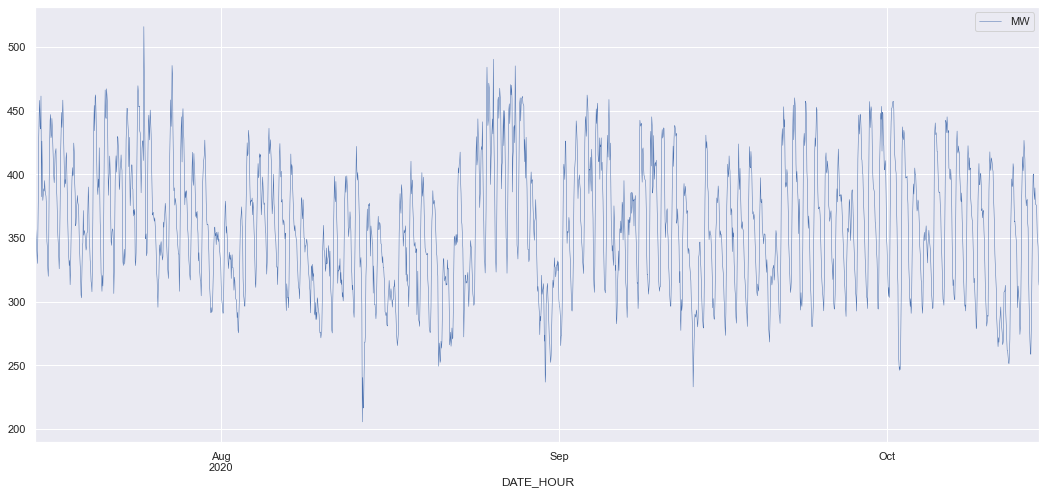

In [161]:
DF_2PACO_T1L1.plot(linewidth=0.5)


In [162]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [163]:
decomposition = sm.tsa.seasonal_decompose(DF_1BALNEO_L, model='additive')

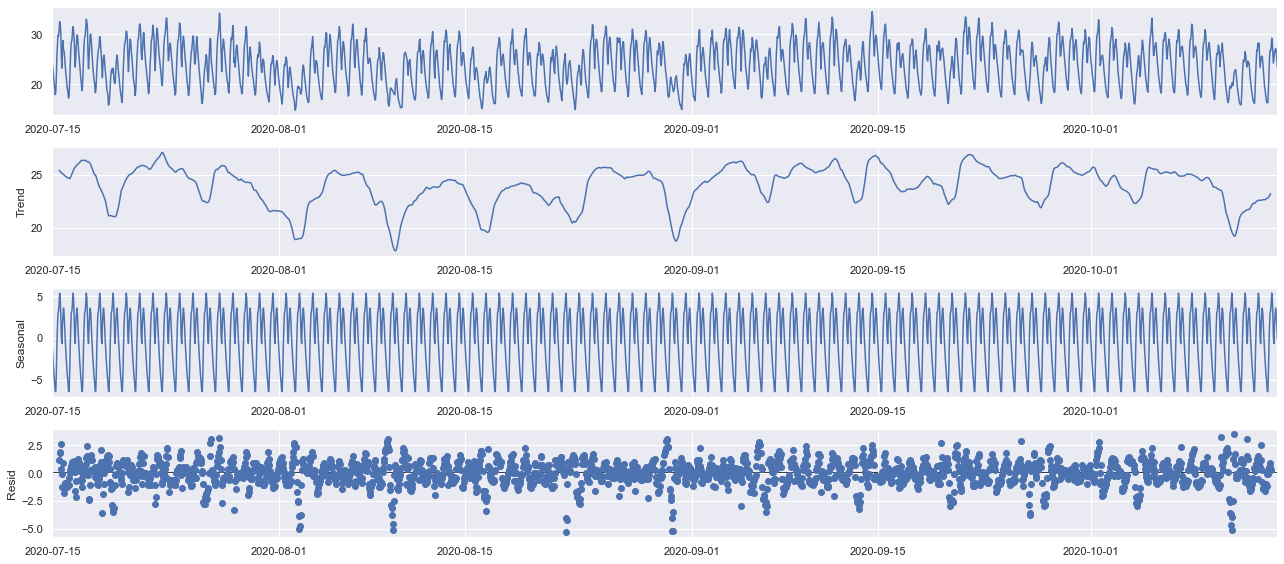

In [164]:
fig = decomposition.plot()
plt.show()

In [167]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(DF_1BALNEO_L,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print ('AIC-order: {}' .format(res.aic_min_order))
        except:
            continue

nda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:7555.417156997451
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:8920.737121373359C:\Users\William\anaconda

In [175]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 0),seasonal_order=(0, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000


In [174]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [127]:
df_orig

,DELIVERY_DATE,DELIVERY_HOUR,REGION_ID,TYPE_ID,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE
0,7/15/2020,1,LUZON,LD,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01
1,7/15/2020,1,LUZON,LD,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01
2,7/15/2020,1,LUZON,LD,1_PHILEXT,1LAT_PHILEX,33.0,2084.01
3,7/15/2020,1,LUZON,LD,AEC,1MEX_AEC,0.0,2101.26
4,7/15/2020,1,LUZON,LD,ALECO,3DAR_ALECO,34.0,2022.11
...,...,...,...,...,...,...,...,...
576283,10/14/2020,24,LUZON,LD,WESMTMP,3LABO_T1L2,3.8,1.00
576284,10/14/2020,24,LUZON,LD,WESMTMP,3LUZ_001,0.0,1.00
576285,10/14/2020,24,LUZON,LD,WESMTMP,3MAKBA_T3L2,37.4,1.00
576286,10/14/2020,24,LUZON,LD,WESMTMP,3MLAYA_T2L2,0.0,1.01


In [128]:
df.head()

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
0,2020-07-15,0 days,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01,2020-07-15
1,2020-07-15,0 days,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01,2020-07-15
2,2020-07-15,0 days,1_PHILEXT,1LAT_PHILEX,33.0,2084.01,2020-07-15
3,2020-07-15,0 days,AEC,1MEX_AEC,0.0,2101.26,2020-07-15
4,2020-07-15,0 days,ALECO,3DAR_ALECO,34.0,2022.11,2020-07-15


In [129]:
df.groupby(df['DELIVERY_DATE'].dt.date)

In [130]:
df

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
0,2020-07-15,0 days 00:00:00,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01,2020-07-15 00:00:00
1,2020-07-15,0 days 00:00:00,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01,2020-07-15 00:00:00
2,2020-07-15,0 days 00:00:00,1_PHILEXT,1LAT_PHILEX,33.0,2084.01,2020-07-15 00:00:00
3,2020-07-15,0 days 00:00:00,AEC,1MEX_AEC,0.0,2101.26,2020-07-15 00:00:00
4,2020-07-15,0 days 00:00:00,ALECO,3DAR_ALECO,34.0,2022.11,2020-07-15 00:00:00
...,...,...,...,...,...,...,...
576283,2020-10-14,0 days 23:00:00,WESMTMP,3LABO_T1L2,3.8,1.00,2020-10-14 23:00:00
576284,2020-10-14,0 days 23:00:00,WESMTMP,3LUZ_001,0.0,1.00,2020-10-14 23:00:00
576285,2020-10-14,0 days 23:00:00,WESMTMP,3MAKBA_T3L2,37.4,1.00,2020-10-14 23:00:00
576286,2020-10-14,0 days 23:00:00,WESMTMP,3MLAYA_T2L2,0.0,1.01,2020-10-14 23:00:00


In [131]:
df_fe

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
0,2020-07-15,0 days 00:00:00,1LT_T2L1T,1LATRI_T2L1,6.7,2084.01,2020-07-15 00:00:00
1,2020-07-15,0 days 00:00:00,1LT_T2L2T,1LATRI_T2L2,15.8,2084.01,2020-07-15 00:00:00
2,2020-07-15,0 days 00:00:00,1_PHILEXT,1LAT_PHILEX,33.0,2084.01,2020-07-15 00:00:00
3,2020-07-15,0 days 00:00:00,AEC,1MEX_AEC,0.0,2101.26,2020-07-15 00:00:00
4,2020-07-15,0 days 00:00:00,ALECO,3DAR_ALECO,34.0,2022.11,2020-07-15 00:00:00
...,...,...,...,...,...,...,...
576283,2020-10-14,0 days 23:00:00,WESMTMP,3LABO_T1L2,3.8,1.00,2020-10-14 23:00:00
576284,2020-10-14,0 days 23:00:00,WESMTMP,3LUZ_001,0.0,1.00,2020-10-14 23:00:00
576285,2020-10-14,0 days 23:00:00,WESMTMP,3MAKBA_T3L2,37.4,1.00,2020-10-14 23:00:00
576286,2020-10-14,0 days 23:00:00,WESMTMP,3MLAYA_T2L2,0.0,1.01,2020-10-14 23:00:00


In [46]:
#DF_2PACO_T1L1

In [132]:
DF_2PACO_T1L1 = df_fe[df_fe['RESOURCE_ID'] == '2PACO_T1L1']

In [133]:
DF_2PACO_T1L1

,DELIVERY_DATE,DELIVERY_HOUR,PARTICIPANT_ID,RESOURCE_ID,MW,PRICE,DATE_HOUR
26,2020-07-15,0 days 00:00:00,MERALCO,2PACO_T1L1,371.9,2115.13,2020-07-15 00:00:00
287,2020-07-15,0 days 01:00:00,MERALCO,2PACO_T1L1,360.3,1912.02,2020-07-15 01:00:00
548,2020-07-15,0 days 02:00:00,MERALCO,2PACO_T1L1,353.6,1731.19,2020-07-15 02:00:00
809,2020-07-15,0 days 03:00:00,MERALCO,2PACO_T1L1,344.8,1730.16,2020-07-15 03:00:00
1070,2020-07-15,0 days 04:00:00,MERALCO,2PACO_T1L1,337.8,1726.71,2020-07-15 04:00:00
...,...,...,...,...,...,...,...
575009,2020-10-14,0 days 19:00:00,MERALCO,2PACO_T1L1,348.3,1338.22,2020-10-14 19:00:00
575270,2020-10-14,0 days 20:00:00,MERALCO,2PACO_T1L1,343.0,1389.94,2020-10-14 20:00:00
575531,2020-10-14,0 days 21:00:00,MERALCO,2PACO_T1L1,318.2,1695.01,2020-10-14 21:00:00
575792,2020-10-14,0 days 22:00:00,MERALCO,2PACO_T1L1,313.0,1309.03,2020-10-14 22:00:00


In [134]:
#Daily sum of 2PACO_T1L1
Daily2PACO_T1L1 = DF_2PACO_T1L1.groupby('DELIVERY_DATE')['MW'].agg('sum').reset_index()

In [135]:
Daily2PACO_T1L1

,DELIVERY_DATE,MW
0,2020-07-15,9409.4
1,2020-07-16,9558.5
2,2020-07-17,9512.6
3,2020-07-18,8889.5
4,2020-07-19,8344.2
...,...,...
87,2020-10-10,8546.2
88,2020-10-11,6826.1
89,2020-10-12,7965.3
90,2020-10-13,8616.8


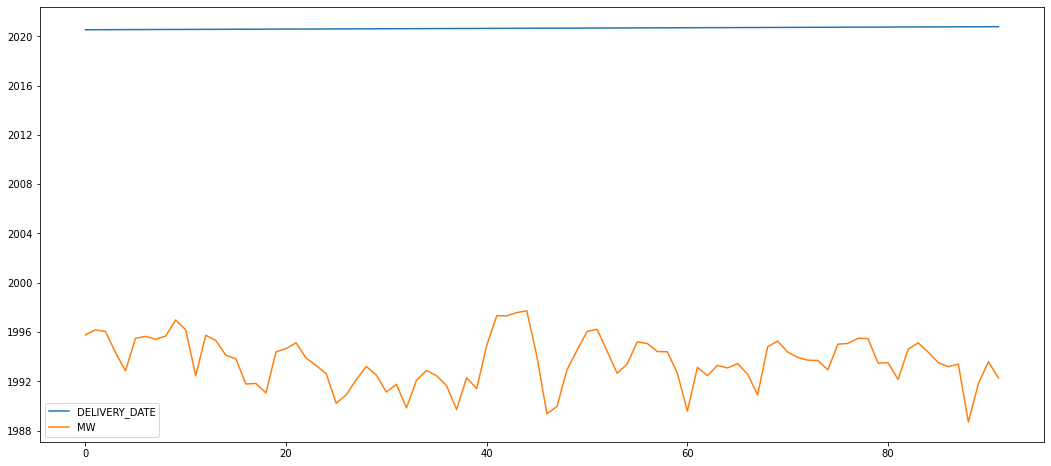

In [136]:
Daily2PACO_T1L1.plot()
plt.show()

In [137]:
#Daily sum of 2PACO_T1L1
Daily2PACO_T1L1 = DF_2PACO_T1L1.groupby('DELIVERY_DATE')['MW'].agg('sum')

In [138]:
Daily2PACO_T1L1

DELIVERY_DATE
2020-07-15    9409.4
2020-07-16    9558.5
2020-07-17    9512.6
2020-07-18    8889.5
2020-07-19    8344.2
               ...  
2020-10-10    8546.2
2020-10-11    6826.1
2020-10-12    7965.3
2020-10-13    8616.8
2020-10-14    8128.0
Name: MW, Length: 92, dtype: float64

<AxesSubplot:xlabel='DELIVERY_DATE'>

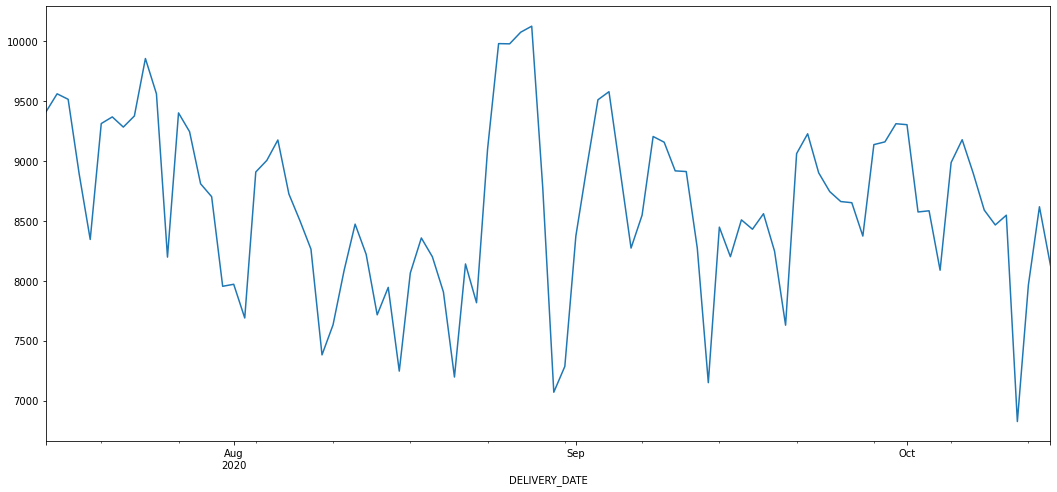

In [140]:
Daily2PACO_T1L1.plot()

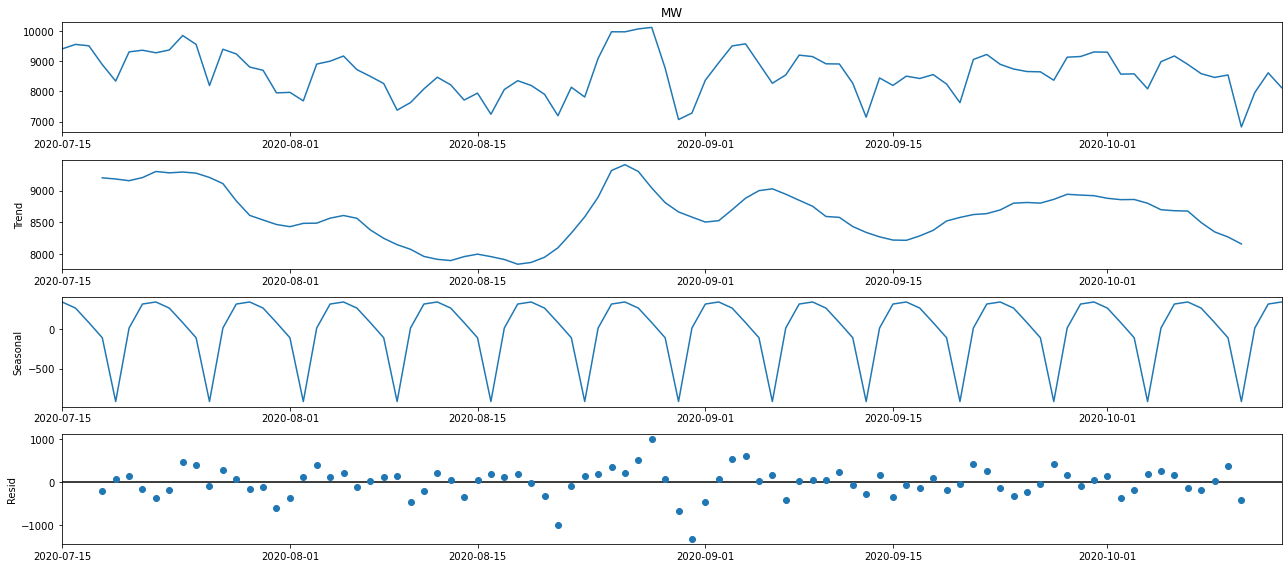

In [141]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(Daily2PACO_T1L1, model='additive')
fig = decomposition.plot()
plt.show()

In [142]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [143]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Daily2PACO_T1L1,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print ('AIC-order: {}'.format(res.aic_min_order))
        except:
            continue

els\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will

In [144]:
mod = sm.tsa.statespace.SARIMAX(Daily2PACO_T1L1,order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7811      0.111     -7.031      0.000      -0.999      -0.563
ma.L1          0.9986      2.952      0.338      0.735      -4.787       6.784
ma.S.L12      -0.6702      0.156     -4.308      0.000      -0.975      -0.365
sigma2      5.097e+05   1.48e+06      0.344      0.731   -2.39e+06    3.41e+06


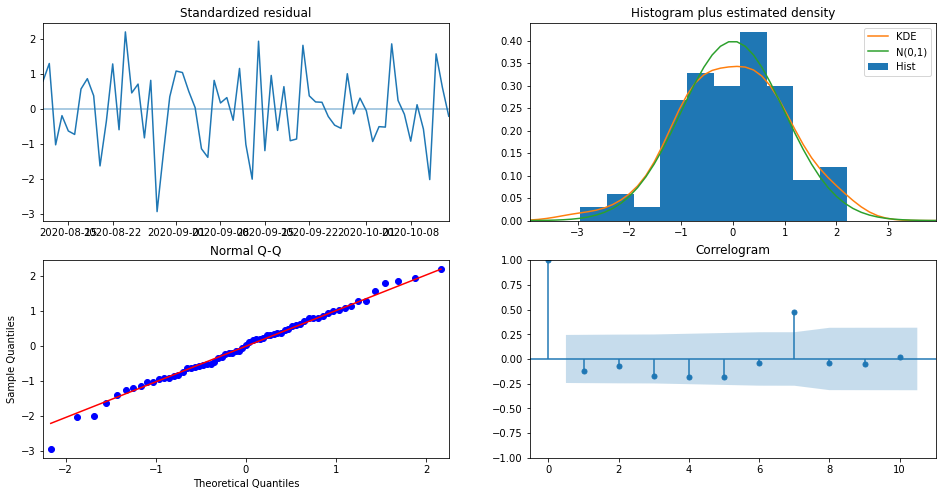

In [145]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [146]:
Daily2PACO_T1L1 = DF_2PACO_T1L1.groupby('DELIVERY_DATE')['MW'].agg('sum').reset_index()

In [148]:
Daily2PACO_T1L1.head()

,DELIVERY_DATE,MW
0,2020-07-15,9409.4
1,2020-07-16,9558.5
2,2020-07-17,9512.6
3,2020-07-18,8889.5
4,2020-07-19,8344.2


In [162]:
y = Daily2PACO_T1L1.set_index('DELIVERY_DATE')

In [163]:
y

,MW
DELIVERY_DATE,
2020-07-15,9409.4
2020-07-16,9558.5
2020-07-17,9512.6
2020-07-18,8889.5
2020-07-19,8344.2
...,...
2020-10-10,8546.2
2020-10-11,6826.1
2020-10-12,7965.3


<AxesSubplot:xlabel='DELIVERY_DATE'>

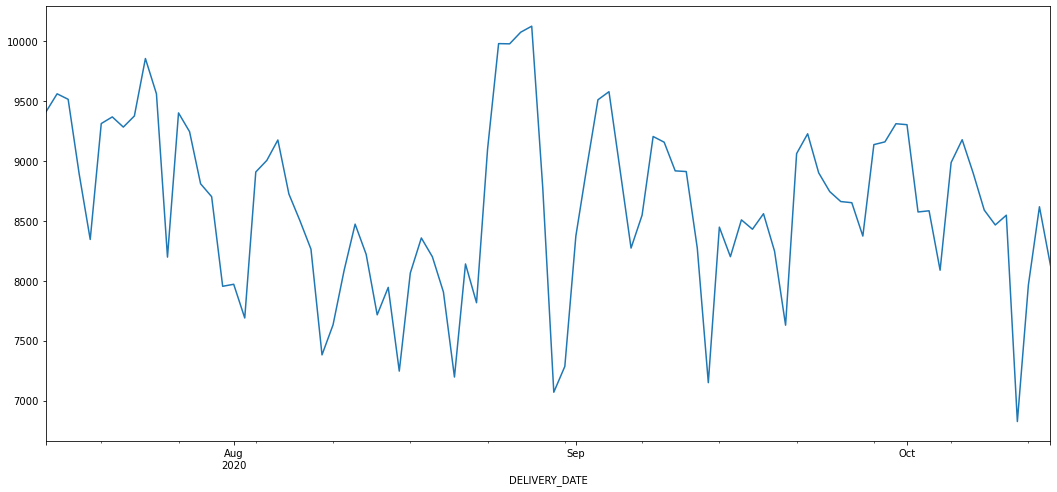

In [164]:
y['MW'].plot()

<AxesSubplot:>

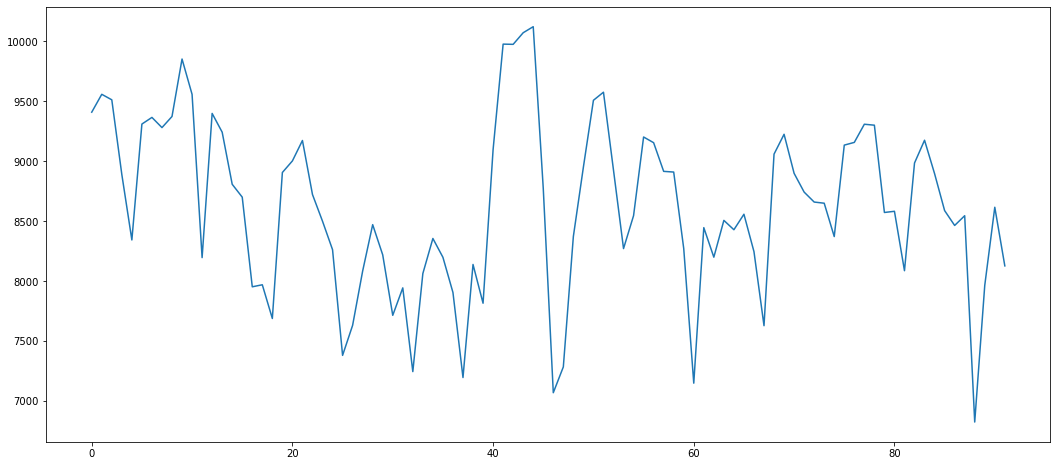

In [160]:
Daily2PACO_T1L1['MW'].plot()

In [166]:
y['MW'].rolling(window=7).mean()

DELIVERY_DATE
2020-07-15            NaN
2020-07-16            NaN
2020-07-17            NaN
2020-07-18            NaN
2020-07-19            NaN
                 ...     
2020-10-10    8678.014286
2020-10-11    8497.771429
2020-10-12    8352.000000
2020-10-13    8272.171429
2020-10-14    8162.357143
Name: MW, Length: 92, dtype: float64

In [157]:
Daily2PACO_T1L['MW'].rolling(window=7).mean()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
         ...     
87    8678.014286
88    8497.771429
89    8352.000000
90    8272.171429
91    8162.357143
Name: MW, Length: 92, dtype: float64

In [153]:
x = Daily2PACO_T1L1['MW'].rolling(window=7).mean()

In [155]:
x.head(10)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6    9198.657143
7    9180.314286
8    9153.900000
9    9202.471429
Name: MW, dtype: float64

In [159]:
MA_Daily2PACO_T1L1 = Daily2PACO_T1L1['MW'].rolling(window=7).mean()

In [170]:
MA_Daily2PACO_T1L1 = MA_Daily2PACO_T1L1.dropna()

In [81]:
MA_Daily2PACO_T1L1

NameError: name 'MA_Daily2PACO_T1L1' is not defined

<AxesSubplot:>

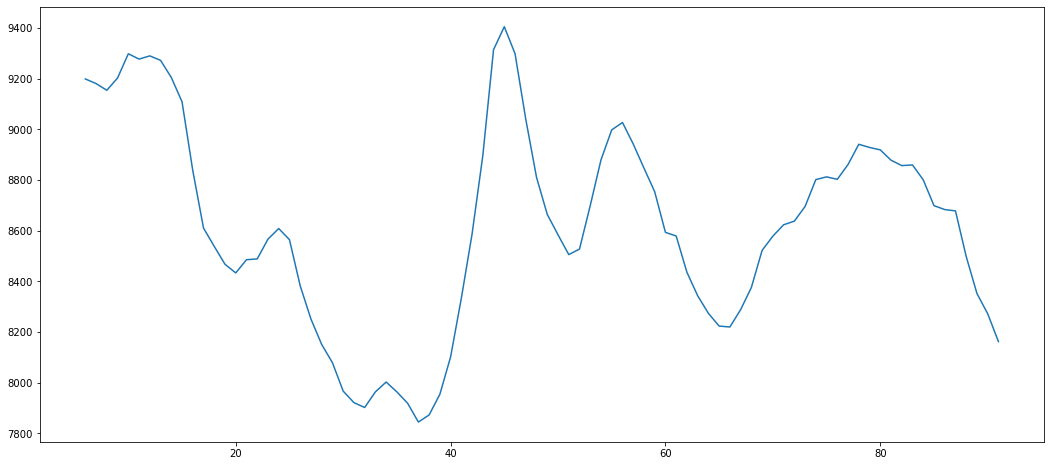

In [171]:
MA_Daily2PACO_T1L1.plot()

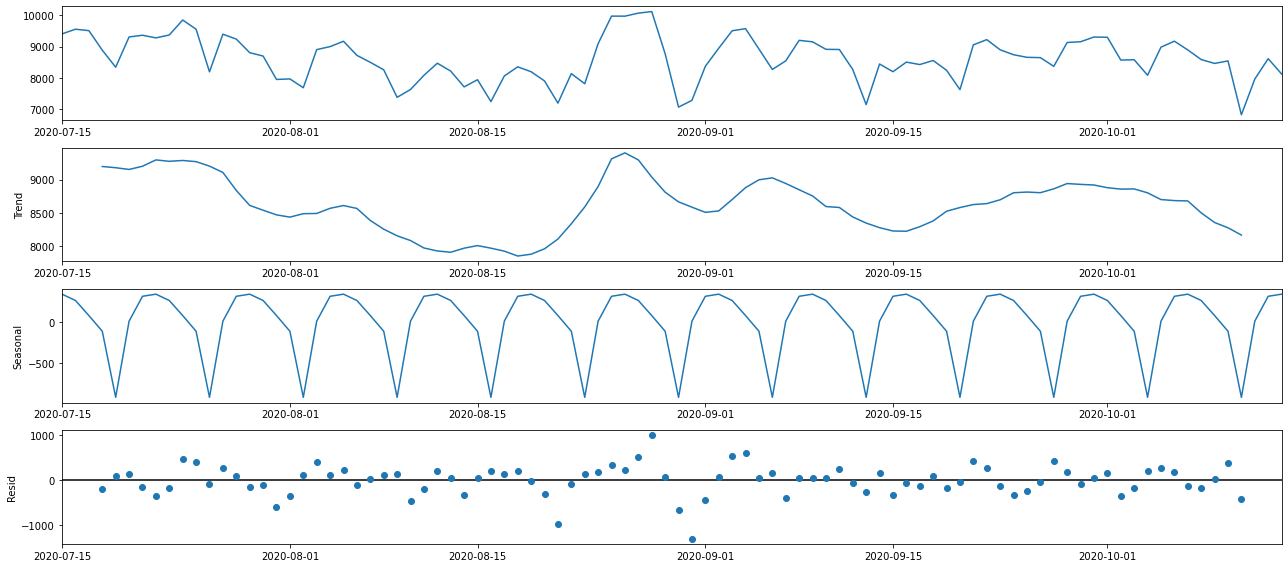

In [167]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [169]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

els\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will

In [ ]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1057.3303957984836

In [171]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0062      0.118      0.052      0.958      -0.225       0.237
ar.S.L12       0.0959      0.244      0.392      0.695      -0.383       0.575
ma.S.L12      -0.8341      0.509     -1.639      0.101      -1.831       0.163
sigma2      5.319e+05   1.59e+05      3.355      0.001    2.21e+05    8.43e+05


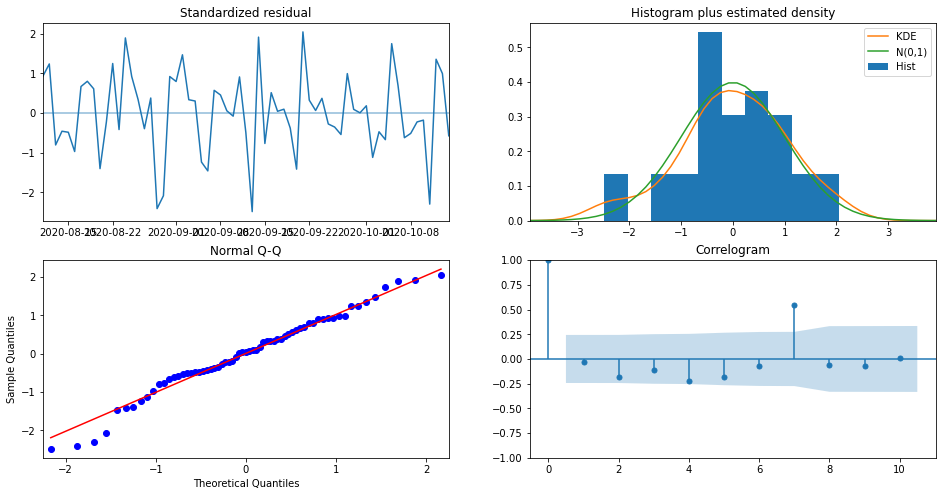

In [172]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

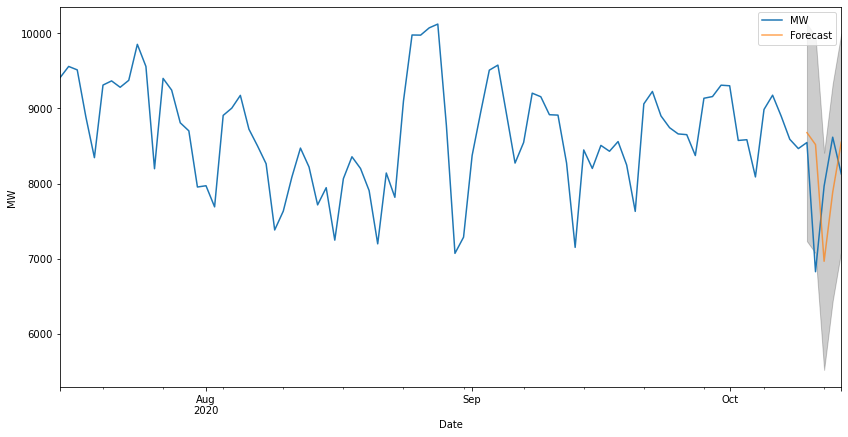

In [178]:
pred = results.get_prediction(start=pd.to_datetime('2020-10-10'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('MW')
plt.legend()
plt.show()

In [179]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2020-10-10 00:00:00   NaN
2020-10-11 00:00:00   NaN
2020-10-12 00:00:00   NaN
2020-10-13 00:00:00   NaN
2020-10-14 00:00:00   NaN
MW                    NaN
dtype: float64


In [180]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2020-10-10 00:00:00   NaN
2020-10-11 00:00:00   NaN
2020-10-12 00:00:00   NaN
2020-10-13 00:00:00   NaN
2020-10-14 00:00:00   NaN
MW                    NaN
dtype: float64


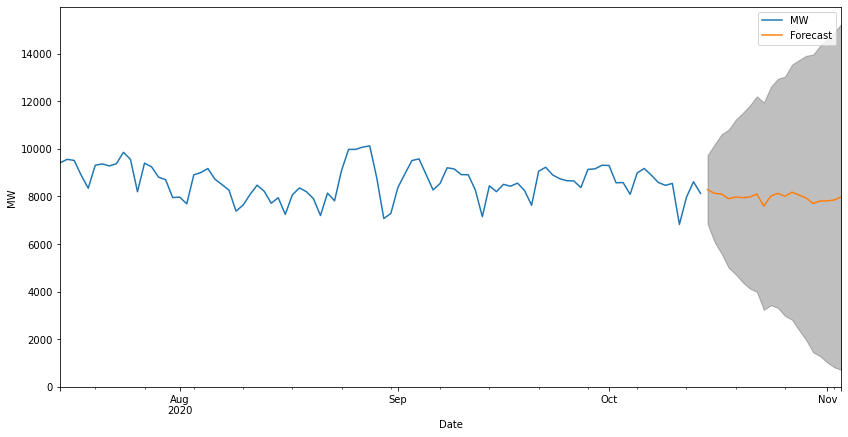

In [183]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('MW')
plt.legend()
plt.show()